Original Data:
    Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0

After Handling Missing Values:
    Duration  Pulse  Maxpulse  Calories
0      60.0  110.0       130     409.1
1      60.0  117.0       145     479.0
2      60.0  105.0       135     340.0
3      45.0  109.0       175     282.4
4      45.0  117.0       148     406.0

After Handling Outliers:
    Duration  Pulse  Maxpulse  Calories
0      60.0  110.0       130     409.1
1      60.0  117.0       145     479.0
2      60.0  105.0       135     340.0
3      45.0  109.0       175     282.4
4      45.0  117.0       148     406.0


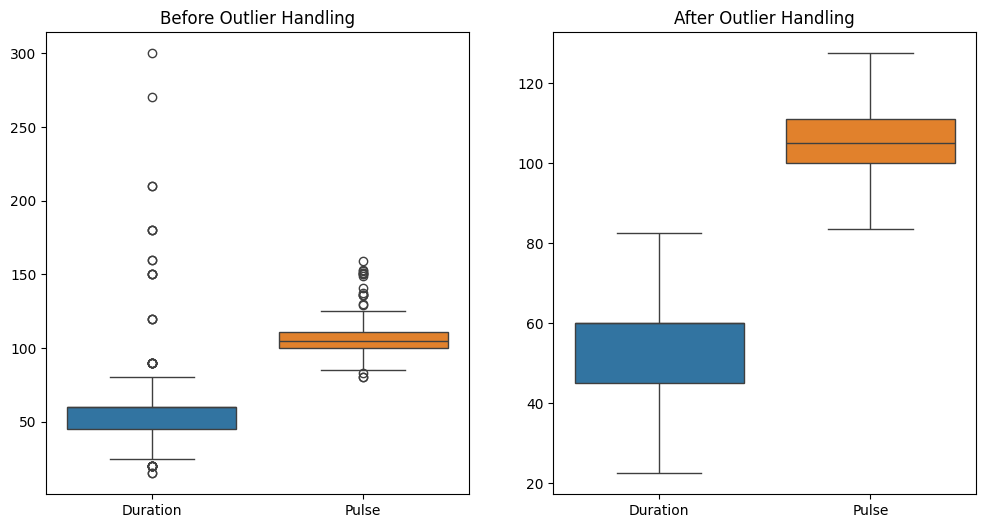

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os

# Get the directory where this notebook is located
notebook_dir = os.path.dirname(os.path.abspath('exp6.ipynb'))
if not notebook_dir or notebook_dir == os.path.abspath('.'):
    notebook_dir = '/Users/sakshamkashyap/Elements_of_Aiml/Exp_6'

# Step 1: Load the dataset
data_path = os.path.join(notebook_dir, 'Data-1.csv')
data = pd.read_csv(data_path)

# Step 2: Simulate missing values by randomly setting some values to NaN for demonstration purpose 

data_missing = data.copy()  # Fixed: removed incorrect argument
data_missing.loc[0,'Duration'] = np.nan # Simulating a missing value in 'Duration'
data_missing.loc[2,'Pulse'] = np.nan # Simulating a missing value in 'Pulse'

# print(data_missing)

# Step 3: Handling Missing Values
# Filling missing numerical values with the median (avoid chained assignment warning)

data_missing['Duration'] = data_missing['Duration'].fillna(data_missing['Duration'].median())
data_missing['Pulse'] = data_missing['Pulse'].fillna(data_missing['Pulse'].median())

# print(data_missing)

# Step 4 : Detecting Outliers using the IQR method

Q1 = data_missing[['Duration','Pulse']].quantile(0.25)
Q3 = data_missing[['Duration','Pulse']].quantile(0.75)
IQR = Q3 - Q1
# print(Q1)
# print(Q3)
# print(IQR)

# Identifying outliers (1.5 * IQR rule)

outliers = ((data_missing[['Duration','Pulse']] < (Q1 - 1.5 * IQR)) |
            (data_missing[['Duration','Pulse']] > (Q3 + 1.5 * IQR))
            )

# Capping outliers: for each column, if outliers replace with the max/min allowed value
data_no_outliers = data_missing.copy()
for column in ['Duration', 'Pulse']:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]

    # Replace values below the lower bound
    data_no_outliers[column] = np.where(data_no_outliers[column] < lower_bound, lower_bound, data_no_outliers[column])

    # Replace values above the upper bound
    data_no_outliers[column] = np.where(data_no_outliers[column] > upper_bound, upper_bound, data_no_outliers[column])

# Step 5: Displaying comparison of original, missing-handled, and outlier-handled data
print("Original Data:\n", data.head())
print("\nAfter Handling Missing Values:\n", data_missing.head())
print("\nAfter Handling Outliers:\n", data_no_outliers.head())

# Step 6: Visualizing the effect of outlier treatment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data_missing[['Duration', 'Pulse']])
plt.title('Before Outlier Handling')

plt.subplot(1, 2, 2)
sns.boxplot(data=data_no_outliers[['Duration', 'Pulse']])
plt.title('After Outlier Handling')

plt.show()
